In [9]:
import re
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB,GaussianNB,\
ComplementNB,BernoulliNB

from sklearn.metrics import accuracy_score

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.callbacks import EarlyStopping

from IPython.display import Image
path = './picture/'

In [10]:
folderDir = ''#'./Data/sentiment labelled sentences/'
rawData = pd.read_table(folderDir + 'amazon_cells_labelled.txt', header=None)
# rawData = pd.read_table(folderDir + 'imdb_labelled.txt', header=None)
# rawData = pd.read_table(folderDir + 'yelp_labelled.txt', header=None)
rawData.columns = ['Sentence', 'Label']
print('Shape =', rawData.shape)
# rawData.info()
rawData.head()

Shape = (1000, 2)


,Sentence,Label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [11]:
rawData.Label.value_counts()

1    500
0    500
Name: Label, dtype: int64

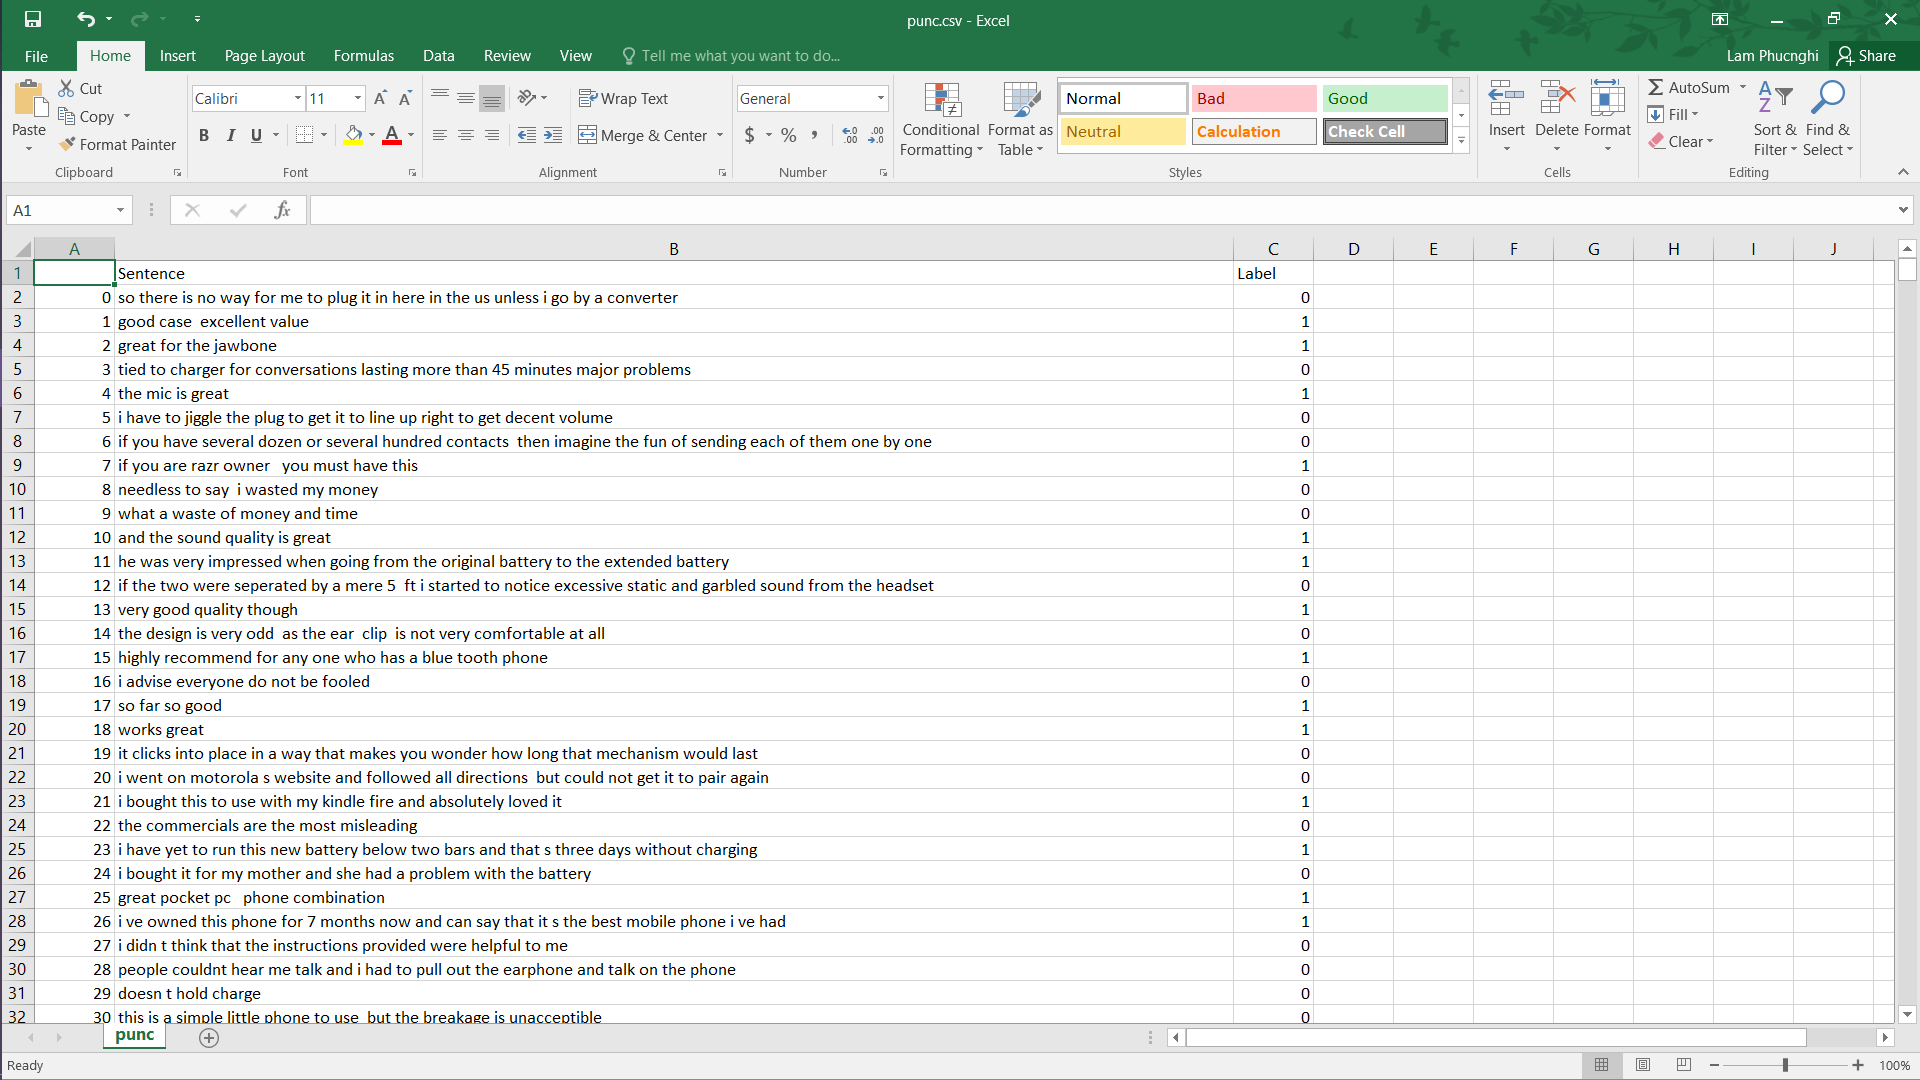

In [12]:
def remove_punctuations(text):
    for punc in string.punctuation:
        text = text.replace(punc, ' ')
    return text

rawData['Sentence'] = rawData['Sentence'].apply(remove_punctuations)
rawData['Sentence'] = rawData['Sentence'].str.lower()
rawData.head()
rawData.to_csv(folderDir + 'punc.csv')
Image(filename = path + 'punc.png')

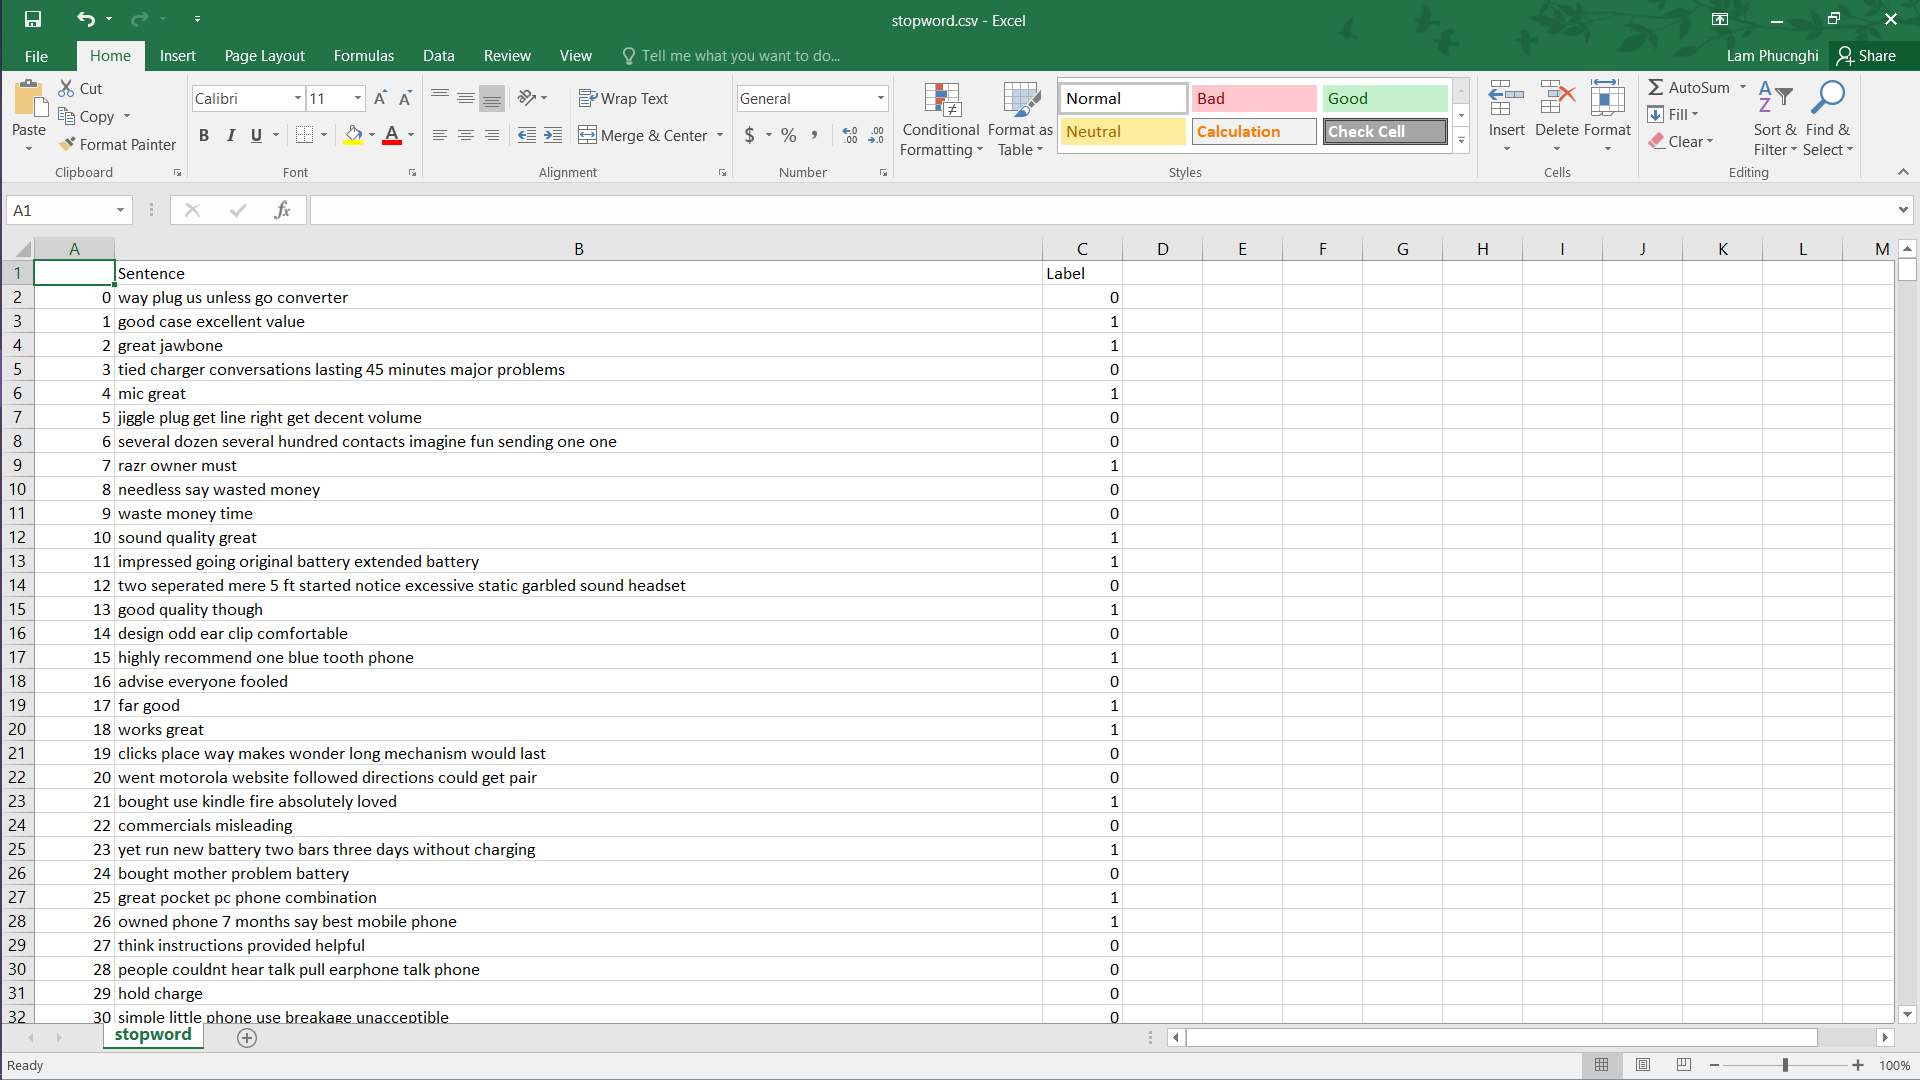

In [14]:
stopList = stopwords.words('english')
nonStopwordData = pd.DataFrame() 
for index, row in rawData.iterrows():
    nonStop = []
    for word in row['Sentence'].split():
        if word not in stopList:
            nonStop.append(word)
    rawData.loc[index, 'Sentence'] = ' '.join(nonStop)
    
rawData.head()
rawData.to_csv(folderDir + 'stopword.csv')
Image(filename = path + 'stopwod.png')

In [15]:
rawData.head()

,Sentence,Label
0,way plug us unless go converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversations lasting 45 minutes ...,0
4,mic great,1


In [16]:
X = rawData['Sentence']
y = rawData['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)

(900,)


In [17]:
vectorizer = TfidfVectorizer(min_df=2)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

vectorizer.get_feature_names()[:10]

['10',
 '20',
 '50',
 '510',
 'able',
 'absolutely',
 'accept',
 'access',
 'actually',
 'additional']

In [19]:
# Multinominal Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)
yPred1 = model.predict(X_test)
#Tính accuracy
print('accuracy:\n', accuracy_score(yPred1, y_test)*100)

accuracy:
 75.0


In [20]:
# Complement Naive Bayes
model = ComplementNB()
model.fit(X_train, y_train)
yPred2 = model.predict(X_test)
#Tính accuracy
print('accuracy:\n', accuracy_score(yPred2, y_test)*100)

accuracy:
 75.0


In [21]:
# Bernoulli Naive Bayes
model = BernoulliNB()
model.fit(X_train, y_train)
yPred3 = model.predict(X_test)
#Tính accuracy
print('accuracy:\n', accuracy_score(yPred3, y_test)*100)

accuracy:
 74.0


In [22]:
#Phan loai voi KNN
from sklearn.neighbors import KNeighborsClassifier
k = 2
acc_score = 0
acc_score_after = 1
while abs(acc_score_after - acc_score) >= 10**(-6):
    acc_score_after = acc_score
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
#     print('y_pred:\n', *y_pred)
#     print('y_true:\n', *y_test)

    #Tính accuracy
    acc_score = accuracy_score(y_pred, y_test)
    print('accuracy:\n', acc_score*100)
    print('k = ', k)
    k+=1
print('y_pred:\n', *y_pred)
print('y_true:\n', *y_test)


accuracy:
 64.0
k =  2
accuracy:
 65.0
k =  3
accuracy:
 62.0
k =  4
accuracy:
 61.0
k =  5
accuracy:
 59.0
k =  6
accuracy:
 62.0
k =  7
accuracy:
 66.0
k =  8
accuracy:
 69.0
k =  9
accuracy:
 68.0
k =  10
accuracy:
 70.0
k =  11
accuracy:
 69.0
k =  12
accuracy:
 70.0
k =  13
accuracy:
 64.0
k =  14
accuracy:
 67.0
k =  15
accuracy:
 66.0
k =  16
accuracy:
 71.0
k =  17
accuracy:
 74.0
k =  18
accuracy:
 72.0
k =  19
accuracy:
 71.0
k =  20
accuracy:
 73.0
k =  21
accuracy:
 72.0
k =  22
accuracy:
 78.0
k =  23
accuracy:
 74.0
k =  24
accuracy:
 76.0
k =  25
accuracy:
 72.0
k =  26
accuracy:
 71.0
k =  27
accuracy:
 74.0
k =  28
accuracy:
 74.0
k =  29
y_pred:
 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1
y_true:
 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 